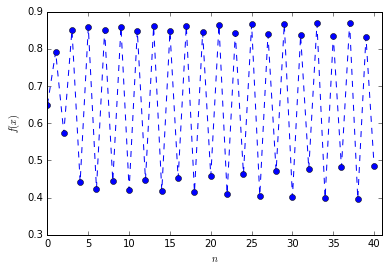

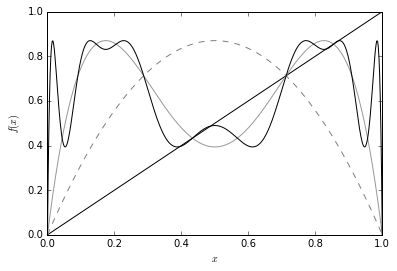

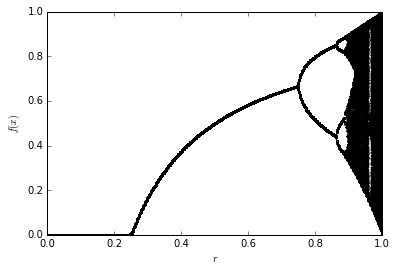

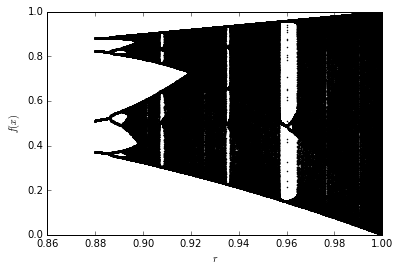

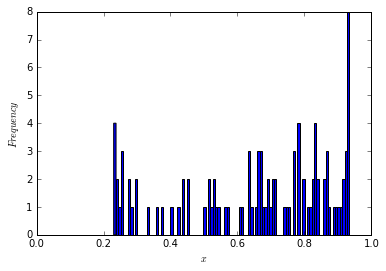

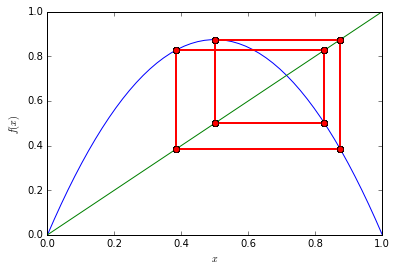

In [55]:
%matplotlib inline
#!/usr/bin/env python

"""
Code for Population Dynamics (W.Kinzel/G.Reents, Physics by Computer)

This code is based on logmap.m listed in Appendix E of the book and will
replicate Figs. 3.1-3.7 of the book.
"""

__author__ = "Christian Alis"
__credits__ = "W.Kinzel/G.Reents"

import numpy as np
import matplotlib.pyplot as plt

f = lambda x, r: 4 * r * x * (1-x)

def iterf(f, x0, r, n):
    # Add a docstring for this function. Parameters should be properly
    # documented and the docstring itself should follow the scipy/numpy
    # docstring convention and ReST format
    """
    Given a function f, a certain value of the parameter r and an initial value of x (x0), 
    iterf evaluates the function f at a new value of x. The new value of x is the value of the function evaluated at the previous value of x.
    This process is iterated n times.
    Parameters
    ----------
    f : a function of x and r 
        The function that is to be used in the iteration 
        will be computed. 
    x0 : float 
        Initial value of x
    r : float
        Parameter of the iteration process
    n: integer
        It is the number of iterations to be done
    Returns
    -------
    out: list of length n+1
        The list of values of the values of f evaluated at different values of x.
    """
    # Is it possible to vectorize this function? Explain why or why not.
    #####ANSWER: It cannot be vectorized because the next value of x will take the previous value of f(x).
    out = [x0]
    for _ in xrange(n):
        out.append(f(out[-1], r))
    return out

def plot_3_1(f=f, x0=0.65, r=0.87, maxiter=40):
    # Add a docstring for this function. Parameters should be properly
    # documented and the docstring itself should follow the scipy/numpy
    # docstring convention and ReST format
    """
    This function has predetermined values of x0 = 0.65, r = 0.87 and number of maximum iterations = 40.
    plot_3_1 calls the function iterf to generate values of f evaluated at different x values starting at x0 and
    this is iterated 40 times.
    Parameters
    ----------
    f : a function of x and r 
        The function that is to be used in the iterf function called by plot_3_1
    x0 : float 
        Initial value of x
    r : float
        Parameter of the iteration process
    maxiter = 40 : integer
        A fixed predetermined value of the number of maximum iterations
    Returns
    -------
    f(x) versus n plot
    """
    ns = range(maxiter+1)
    xs = iterf(f, x0, r, maxiter)
    plt.plot(ns, xs, '--o')
    plt.xlim(0, maxiter+1)
    # add axis labels
    plt.xlabel('$n$')
    plt.ylabel('$f(x)$')
    plt.show()
    
def plot_3_2(f=f, r=0.87):
    # Add a docstring for this function. Parameters should be properly
    # documented and the docstring itself should follow the scipy/numpy
    # docstring convention and ReST format
    """ 
    Given a function f, a certain value of the parameter r, and a predetermined range of x values (0 to 1, 500 evenly spaced points)
    plot_3_2 calls the function iterf to generate four sets of x and y = f(x) values
    1) predetermined x values and their corresponding y = f1(x) values
    2) the resulting x = f1(x) values and their corresponding y = f2(f1(x)) values
    3) the resulting x = f2(f1(x)) values and their corresponding y = f3(f2(f1(x)))
    4) the resulting x = f3(f2(f1(x))) values and their corresponding y = f4(f3(f2(f1(x))))
    
    Parameters
    ----------
    f : a function of x and r 
        The function that is to be used in the iteration 
        will be computed
    r : float
        A constant parameter with predetermined value r = 0.87
    Returns
    -------
    plot of the curves corresponding to ( x, f1(x) ), ( f1(x), f2(f1) ), ( f2(f1)), f3(f2) ), ( f3(f2), f4(f3) )
    """
    x = np.linspace(0, 1, 500)
    fx1 = f(x, r)
    fx2 = f(fx1, r)
    # complete the following two lines
    fx3 = f(fx2, r)
    fx4 = f(fx3, r)
    plt.plot(x, x, 'k')
    plt.plot(x, fx1, '--', color='gray')
    # What is the python type of the value of color?
    ###ANSWER: It's a tuple type.
    # What would happen if (0.6)*3 is used instead of (0.6,)*3?
    ###ANSWER: an error message: "cannot convert argument to rgb sequence", is encountered. The comma (,) after 0.6 is necessary.
    # What would happen if (0.3,)*3 is used instead of (0.6,)*3?
    ###ANSWER: The color of the curve corresponding to (x,fx4) becomes darker
    # What would happen if (0.9,)*3 is used instead of (0.6,)*3?
    ###ANSWER: The color of the curve corresponding to (x,fx4) becomes lighter
    plt.plot(x, fx2, color=(0.6,)*3)
    plt.plot(x, fx4, 'k')
    # add axis labels
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.show()

def plot_3_3(x0=0.3, r_min=0, r_max=1):
    # Add a docstring for this function. Parameters should be properly
    # documented and the docstring itself should follow the scipy/numpy
    # docstring convention and ReST format
    """ 
    This function has predetermined values for x0 and for the minimum and maximum values of r. 
    Plot_3_3 calls the function iterf to generate f(x) values for different values of r.
    
    
    Parameters
    ----------
    f : a function of x and r 
        The function that is to be used in the iteration 
        will be computed
    r : float
        A constant parameter with predetermined value r = 0.87
    Returns
    -------
    plot of transpose of f(x) matrix for different values of r versus r.
    """
    rs = np.linspace(r_min, r_max, 500)
    # What is the purpose of multiplying the output of np.ones() and a number?
    ### ANSWER: The purpose of multiplying the output of np.ones() and a number is 
    ### to generate a list (with a length the same as that of the rs list)
    ####where each value in the list is same as that of the number.
    # What are the dimensions of fxs?
    ### ANSWER: Its dimensions are 1001 by 500.
    # What do the rows and columns of fxs represent?
    ##### ANSWER: The columns represent to different values of r (500) and the rows represent the number of iterations.
    fxs = np.array(iterf(f, np.ones(len(rs))*0.3, rs, 1000))
    # What are the dimensions of fxs?
    #### ANSWER: ### ANSWER: Its dimensions are 1001 by 500.
    # What does .T in the second argument do?
    ### ANSWER: It gets the transpose of the matrix, or the array in this case.
    # Can we use fxs[100:,:] instead of fxs[100:,:].T? Why or why not?
    ### ANSWER: No. It doesn't work (fxs[100:,:]) and we get the error message telling us
    ### that it is demanded that x and y have same dimensions
    # What does the keyword ms do?
    ### ANSWER: The keyword ms is for the markersize. Setting ms to a certain value sets the marker size in the plot.
    plt.plot(rs, fxs[100:,:].T, 'k.', ms=2)
    # add axis labels
    plt.xlabel('$r$')
    plt.ylabel('$T[f(x)]$')
    plt.show()

def plot_3_4(x0=0.3):
    # Add a docstring for this function. Parameters should be properly
    # documented and the docstring itself should follow the scipy/numpy
    # docstring convention and ReST format
    plot_3_3(r_min=0.88)
    """ 
    This function does the same process as the function plot_3_3 except that the x0 value in this case is different: x0 = 0.3
    
    Parameters
    ----------
    f : a function of x and r 
        The function that is to be used in the iteration 
        will be computed
    r : float
        A constant parameter with predetermined value r = 0.87
    Returns
    -------
    plot of transpose of f(x) matrix for different values of r versus r when x0 = 0.3.
    """
    
def plot_3_5(x0=0.3, r = 0.934):
    # Add a docstring for this function. Parameters should be properly
    # documented and the docstring itself should follow the scipy/numpy
    # docstring convention and ReST format
    """ 
    Given predetermined values of x0=0.3 and r=0.934, plot_3_5 calls the function iterf 
    to calculate the set of f(x) values correponding to the predetermined parameters.
    
    Parameters
    ----------
    x0 = 0.3 : float 
        Predetermined initial value of x
    r = 0.934 : float
        Predetermined value of r
        
    Returns
    -------
    Histogram showing the distribution and probabilities of the set of values of f(x) for the predetermined values of x0 and r
    """
    # Complete the following line
    fxs = iterf(f, x0, r, 100)
    plt.hist(fxs, bins=100)
    plt.xlim(xmin=0)
    # add axis labels
    plt.xlabel('$f(x)$')
    plt.ylabel('$Frequency$')
    plt.show()

def plot_3_6(x0=0.3, r=0.874640, maxiter=1000):
    # Add a docstring for this function. Parameters should be properly
    # documented and the docstring itself should follow the scipy/numpy
    # docstring convention and ReST format
    """ 
    This function has predetermined values of x0=0.3, r=0.874640, and maxiter=1000 and calls the function iterf
    to calculate the corresponding values of f(x) as x is varied. 
    
    Parameters
    ----------
    x0=0.3 : float
        the predetermined initial value of x
    r=0.874640 : float
        the predetermined value of the parameter r
    maxiter=1000 : integer
        the predetermined number of maximum iterations
    Returns
    -------
    plot of the curves corresponding to (x, f(x)), (x, g(x) = x), (x, )
    """
    xs = np.linspace(0, 1)
    fxs = iterf(f, x0, r, 1000)[100:]
    # complete the next two lines
    plt.plot(xs, f(xs,r))
    plt.plot(xs, xs)
    # What are the first 10 elements of the first argument of the ff. 
    # plt.plot() call?
    #### ANSWER: 
    
    # Why was the last element of fxs omitted in the argument of np.repeat()?
    #### ANSWER: 
    
    # Can we use fxs[:-1]*2 instead of np.repeat(fxs[:-1], 2)? Why or why not?
    plt.plot(np.repeat(fxs[:-1], 2), 
    # What does the following argument of plt.plot() call represent?
    #### ANSWER: It represents a list where each element of the fxs list up to the one before the last is doubled:
             ### ex. analogy: fxs  = [0,1,2], np.repeat(fxs[-1],2) = [0,0,1,1]        
             
    # What are the dimensions/shape of the following plt.plot() argument?
    #### ANSWER: (1800,)
             
    # What are the dimensions of the argument of np.column_stack()?      
    ### ANSWER: fxs[:-1]--> (900,) & fxs[1:]--> (900,)
             
    # Why was the first element of fxs[1:] omitted?
    ### ANSWER: 
             
    # What would happen if .ravel() is removed?
    ### The function doesn't work well and running it returns an error where it tells us to make sure that x and y have the same dimensions.
             
    # Can we use np.ravel(zip(fxs[:,1], fxs[1:])) instead of 
    # np.column_stack((fxs[:-1], fxs[1:])).ravel()? Why or why not?
    ### ANSWER: 
             
             np.column_stack((fxs[:-1], fxs[1:])).ravel(), 
             '-o')
    # add axis labels
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$ ')
    plt.show()

def plot_3_7(x0=0.3, r=0.96420, maxiter=1000):
    # Add a docstring for this function. Parameters should be properly
    # documented and the docstring itself should follow the scipy/numpy
    # docstring convention and ReST format
    """ 
    This function has predetermined values of x0=0.3, r=0.96420, and maxiter=1000 and calls the function iterf
    to calculate the corresponding values of f(x) as x is varied. 
    
    Parameters
    ----------
    x0=0.3: float
        the predetermined initial value of x
    r=0.96420 : float
        the predetermined value of the parameter r
    maxiter=1000 : integer
        the predetermined number of maximum iterations
     
    Returns
    -------
    plot of the curves corresponding to (x, f(x)), (x, g(x) = x), (x, )
    """
    # complete the following line
    plot_3_6(x0, r)

# # OPTIONAL:
# # * Replace np.ones(len(rs))*0.3 with an equivalent expression that uses
# #   the Python standard library only (no numpy)
# # * write iterf() as a recursive function
# # * estimate the Feigenbaum constant
# # * add interactivity to your plots

if __name__ == "__main__":
    plot_3_1()
    plot_3_2()
    plot_3_3()
    plot_3_4()
    plot_3_5()
    plot_3_6()
    plot_3_7()



In [25]:
help(plot_3_1)

Help on function plot_3_1 in module __main__:

plot_3_1(f=<function <lambda>>, x0=0.65, r=0.87, maxiter=40)
    Given a function f, a certain value of the parameter r and an initial value of x (x0), 
    plot_3_1 calls the function iterf to generate x and f(x) values
    Parameters
    ----------
    f : a function of x and r 
        The function that is to be used in the iteration 
        will be computed
    x0 : float 
        Initial value of x
    r : float
        Parameter of the iteration process
    n: integer
        It is the number of iterations to be done
    Returns
    -------
    f(x) versus x plot



In [58]:
%matplotlib inline
#!/usr/bin/env python

"""
Code for Population Dynamics (W.Kinzel/G.Reents, Physics by Computer)

This code is based on logmap.m listed in Appendix E of the book and will
replicate Figs. 3.1-3.7 of the book.
"""

__author__ = "Christian Alis"
__credits__ = "W.Kinzel/G.Reents"

import numpy as np
import matplotlib.pyplot as plt

f = lambda x, r: 4 * r * x * (1-x)

def iterf(f, x0, r, n):
    # Add a docstring for this function. Parameters should be properly
    # documented and the docstring itself should follow the scipy/numpy
    # docstring convention and ReST format
    """
    Given a function f, a certain value of the parameter r and an initial value of x (x0), 
    iterf evaluates the function f at a new value of x. The new value of x is the value of the function evaluated at the previous value of x.
    This process is iterated n times.
    Parameters
    ----------
    f : a function of x and r 
        The function that is to be used in the iteration 
        will be computed. 
    x0 : float 
        Initial value of x
    r : float
        Parameter of the iteration process
    n: integer
        It is the number of iterations to be done
    Returns
    -------
    out: list of length n+1
        The list of values of the values of f evaluated at different values of x.
    """
    # Is it possible to vectorize this function? Explain why or why not.
    out = [x0]
    for _ in xrange(n):
        out.append(f(out[-1], r))
    return out

def plot_3_1(f=f, x0=0.65, r=0.87, maxiter=40):
    # Add a docstring for this function. Parameters should be properly
    # documented and the docstring itself should follow the scipy/numpy
    # docstring convention and ReST format
    """
    Given a function f, a certain value of the parameter r and an initial value of x (x0), 
    plot_3_1 calls the function iterf to generate x and f(x) values
    Parameters
    ----------
    f : a function of x and r 
        The function that is to be used in the iteration 
        will be computed
    x0 : float 
        Initial value of x
    r : float
        Parameter of the iteration process
    n: integer
        It is the number of iterations to be done
    Returns
    -------
    f(x) versus x plot
    """
    ns = range(maxiter+1)
    xs = iterf(f, x0, r, maxiter)
    plt.plot(ns, xs, '--o')
    plt.xlim(0, maxiter+1)
    # add axis labels
    plt.xlabel('$n$')
    plt.ylabel('$f(x)$')
    plt.show()
    
def plot_3_2(f=f, r=0.87):
    # Add a docstring for this function. Parameters should be properly
    # documented and the docstring itself should follow the scipy/numpy
    # docstring convention and ReST format
    """ 
    Given a function f, a certain value of the parameter r, and a predetermined range of x values (0 to 1, 500 evenly spaced points)
    plot_3_2 calls the function iterf to generate four sets of x and y = f(x) values
    1) predetermined x values and their corresponding y = f1(x) values
    2) the resulting x = f1(x) values and their corresponding y = f2(f1(x)) values
    3) the resulting x = f2(f1(x)) values and their corresponding y = f3(f2(f1(x)))
    4) the resulting x = f3(f2(f1(x))) values and their corresponding y = f4(f3(f2(f1(x))))
    
    Parameters
    ----------
    f : a function of x and r 
        The function that is to be used in the iteration 
        will be computed
    r : float
        A constant parameter with predetermined value r = 0.87
    Returns
    -------
    plot of the curves corresponding to ( x, f1(x) ), ( f1(x), f2(f1) ), ( f2(f1)), f3(f2) ), ( f3(f2), f4(f3) )
    """
    x = np.linspace(0, 1, 500)
    fx1 = f(x, r)
    fx2 = f(fx1, r)
    # complete the following two lines
    fx3 = f(fx2, r)
    fx4 = f(fx3, r)
    plt.plot(x, x, 'k')
    plt.plot(x, fx1, '--', color='gray')
    # What is the python type of the value of color?
    # What would happen if (0.6)*3 is used instead of (0.6,)*3?
    ###ANSWER: an error message: "cannot convert argument to rgb sequence", is encountered. The comma (,) after 0.6 is necessary.
    # What would happen if (0.3,)*3 is used instead of (0.6,)*3?
    # What would happen if (0.9,)*3 is used instead of (0.6,)*3?
    plt.plot(x, fx2, color=(0.9,)*3)
    plt.plot(x, fx4, 'k')
    # add axis labels
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.show()
plot_3_2()